Clustering Assignment

Name: S U Swakath

Roll no: 180020036

Clustering:
1. K-means
2. Fuzzy C-means
3. GMM
4. Practical Example (repeat for all 3)


# 1. K-means clustering 
a) Data genearation

b) Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)


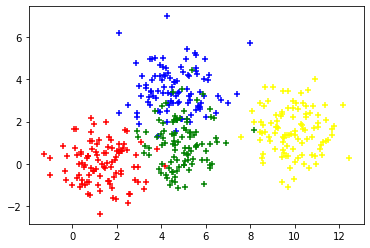

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation
num = 100
x1 = np.random.randn(num) + 1.5
y1 = np.random.randn(num) 

x2 = np.random.randn(num) + 4.5
y2 = np.random.randn(num) + 3.5

x3 = np.random.randn(num) + 5
y3 = np.random.randn(num) + 1

x4 = np.random.randn(num) + 10
y4 = np.random.randn(num) + 1.5

plt.scatter(x1,y1,color="red",marker= "+")
plt.scatter(x2,y2,color="blue",marker= "+")
plt.scatter(x3,y3,color="green",marker= "+")
plt.scatter(x4,y4,color="yellow",marker= "+")

x=np.concatenate([x1,x2,x3,x4])
y=np.concatenate([y1,y2,y3,y4])
data = np.c_[x,y]


## Cluster Initialization

a) Randomly initialize the cluster centers (any k- number of data points from the generated data)



[[ 5.38715859  0.01407979]
 [ 5.24279733  0.75295197]
 [ 9.14376232  2.29127235]
 [-0.26717475 -0.7795218 ]]


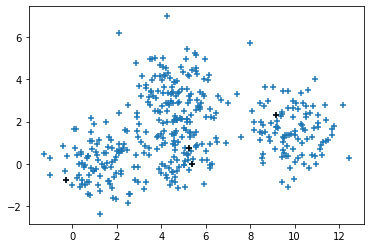

In [ ]:
# write your code here

Initial_centers = data[np.random.choice(data.shape[0], 4, replace=False),:] 
print(Initial_centers)
plt.scatter(data[:,0],data[:,1],marker="+")
plt.scatter(Initial_centers[:,0],Initial_centers[:,1],color="black",marker="+")
plt.show()

## Cluster assignment and re-estimation Stage 

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

In [ ]:
# K_means algo
def remove_from_array(base_array, test_array):
    flg = 0
    for index in range(len(base_array)):
        if np.array_equal(base_array[index], test_array):
            base_array.pop(index)
            flg = 1;
            break
    if flg == 0:
      print('remove_from_array(array, x): x not in array')

def error(e_clusters,e_centers):
  error = 0 ;
  len = 0;
  for i in range(e_centers.shape[0]):
    len += e_clusters[i].shape[0];
    temp = np.subtract(e_clusters[i],e_centers[i,:])
    temp = np.multiply(temp,temp)
    temp = np.sum(temp, axis = 1, keepdims = True)
    temp = np.sqrt(temp)
    errC= np.sum(temp)
    error += errC
  error = error/len
  return error

def cluster_assignment(ca_data,ca_centers):
  dim = np.shape(ca_data)[1]
  K = ca_centers.shape[0]
  ch = np.array([0])
  data_len = ca_data.shape[0]
  new_clusters = [np.zeros(dim)]* K
  temp = []
  for i in range(ca_data.shape[0]):
    val = ca_data[i,:]
    temp = np.subtract(ca_centers,val)
    temp = np.multiply(temp,temp)
    temp = np.sum(temp, axis = 1)
    arg_min = np.argmin(temp)
    new_clusters[arg_min] = np.vstack([new_clusters[arg_min],val])
    temp =[]
 
  for i in range(len(new_clusters)):
    new_clusters[i] =np.delete(new_clusters[i], (0), axis=0)
  
  empty = 0
  for x in new_clusters:
    if np.array_equal(x,ch):
      empty+=1
  if empty!=0:
    for i in range(empty):
      for j in range(ca_centers.shape[0]):
        if np.array_equal(new_clusters[j],ch):
          remove_from_array(new_clusters, ch)
          ca_centers = np.delete(ca_centers,(j),axis=0)
          break
  return new_clusters,ca_centers    

def get_centers(g_clusters):
  dim = np.shape(g_clusters[0])[1]
  new_centers = np.zeros(dim)
  temp = []
  for i in range(len(g_clusters)):
    temp = g_clusters[i]
    l = temp.shape[0]
    temp = np.sum(temp, axis = 0)
    temp = temp/l;
    new_centers = np.vstack([new_centers,temp])
  new_centers =np.delete(new_centers,(0), axis=0)
  return new_centers

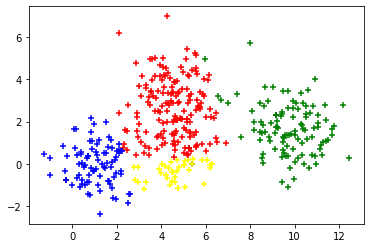

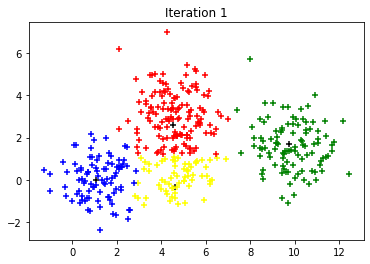

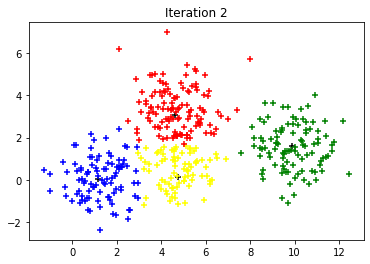

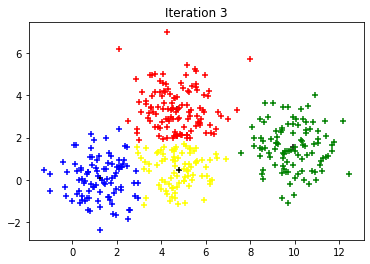

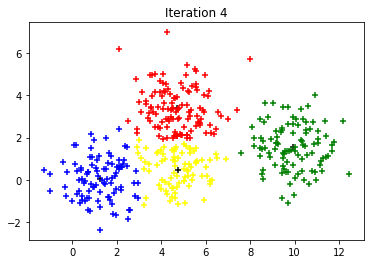

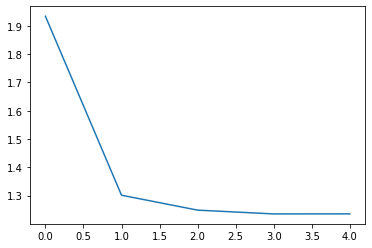

In [ ]:
#Performing K_means 
eps = 0.000001
colors = ["yellow","red","green","blue"]

clusters,centers = cluster_assignment(data,Initial_centers)
err = [error(clusters,centers)]
j = 0

plt.scatter(centers[:,0],centers[:,1],color="black",marker="+")
for x in clusters:
  plt.scatter(x[:,0],x[:,1],color=colors[j],marker="+")
  j+=1;
plt.show()

centers = get_centers(clusters)
i =1;

while(1):
  clusters,centers = cluster_assignment(data,centers)
  err.append(error(clusters,centers))
  plt.title("Iteration %d" %i)
  plt.scatter(centers[:,0],centers[:,1],color="black",marker="+")
  j = 0
  for x in clusters:
    plt.scatter(x[:,0],x[:,1],color=colors[j],marker="+")
    j+=1;
  plt.show()
  if((err[i-1]-err[i])<eps):
    break;
  centers = get_centers(clusters)
  i+=1
plt.plot(err)
plt.show()

# 2. GMM Clustering

##1.  Data generation

a) Use the same data that you generated for K-means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
## Data generation
data_gmm = data
k = 4
# write your code here

## 2. Initialization

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [ ]:
#%% Initialisations

def initialization(data,K,K_num):
  all_clusters_info = []
  for i in range(K_num):
    Initial_centers = data[np.random.choice(data.shape[0], K, replace=False),:]
    eps = 0.000001

    clusters,centers = cluster_assignment(data,Initial_centers)
    err = [error(clusters,centers)]
    centers = get_centers(clusters)
    i =1;

    while(1):
      clusters,centers = cluster_assignment(data,centers)
      err.append(error(clusters,centers))
      if((err[i-1]-err[i])<eps):
        break;
      centers = get_centers(clusters)
      i+=1
    all_clusters_info.append([clusters,centers])
  
  all_error = []
  
  for x in all_clusters_info:
    all_error.append(error(x[0],x[1]))

  best_cluster_info = all_clusters_info[np.argmin(all_error)]
  best_cluster = best_cluster_info[0]
  best_centers = best_cluster_info[1]
  
  phi_clust = [] # {mean_k,variance_k}
  theta_clust = [] #{phi_k,w_k}
  
  total_len = data.shape[0]
  theta = []
  
  for x in best_cluster:
    w = x.shape[0]/total_len
    mean = np.mean(x,axis=0)
    var = np.cov(x.T,bias = True)
    phi_clust = [mean,var];
    theta_clust = [phi_clust,w]
    theta.append(theta_clust)
  return theta


print("Process done")

Process done


In [ ]:
# Expectation stage

#%% E-Step GMM
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):
    data_len = np.shape(data)[0]
    responsibility = np.zeros([data_len,K])
    j = 0
    for theta_current in theta:
      phi = theta_current[0]
      for i in range(data_len):
        prob = multivariate_normal.pdf(data[i,:],phi[0],phi[1])
        responsibility[i,j] = prob*theta_current[1];
      j+=1;
    for i in range(data_len):
      scale = np.sum(responsibility[i,:])
      for j in range(K):
        responsibility[i,j] = responsibility[i,j]/scale
    return responsibility



##3. Expectation stage
$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

## 3. Maximization stage
a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [ ]:
# Maximization stage

#%% M-STEP GMM
def M_Step_GMM(data,responsibility):
    K = np.shape(responsibility)[1]
    data_len = len(data)
    #computing weight
    w_all = np.sum(responsibility,axis=0)
    #computing means
    means = []
    for i in range(K):
      column = responsibility[:,i]
      temp = np.dot(data.T,column)/w_all[i]
      means.append(temp)
  
    #computing variance
    variances = []
    dim = np.shape(data)[1]

    for i in range(K):
      var = np.zeros([dim,dim])
      for j in range(data_len):
        x = data[j,:]
        temp = x-means[i]
        temp = np.array([temp])
        #print(temp)
        temp1 = np.dot(np.transpose(temp),temp)
        #print(temp1)
        var = var + np.multiply(temp1,responsibility[j,i])
      var = var/w_all[i]
      variances.append(var)
    
    
    w_all = w_all/data_len

    theta = []
    for i in range(K):
      phi_k = [means[i],variances[i]]
      teta_k = [phi_k,w_all[i]]
      theta.append(teta_k)
    
    temp = 0
    log_likelihood = 0
    for i in range(data_len):
      for j in range(K):
        temp = temp + w_all[j]*responsibility[i,j]
      log_likelihood =  log_likelihood + math.log(temp)     
    return theta, log_likelihood

## 4. Final run (EM algorithem)
a) initialization

b)Itterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each itteration

0


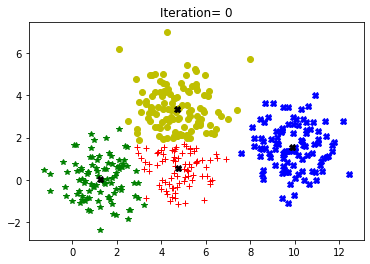

______________________________________________________________
1


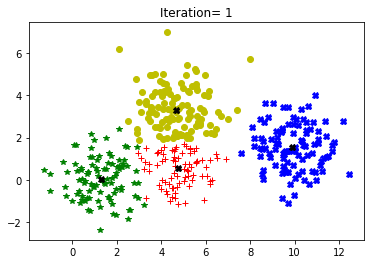

______________________________________________________________
2


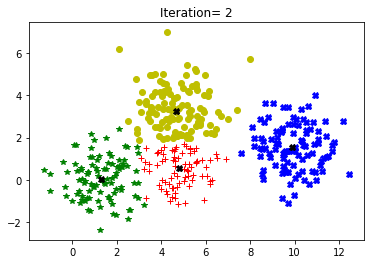

______________________________________________________________
3


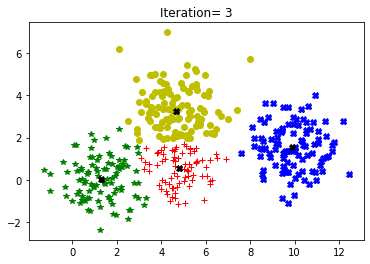

______________________________________________________________
4


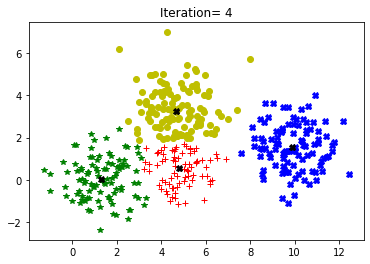

______________________________________________________________
5


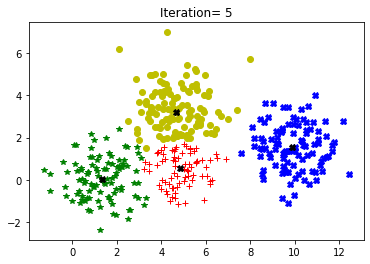

______________________________________________________________
6


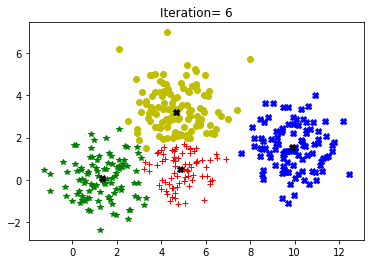

______________________________________________________________
7


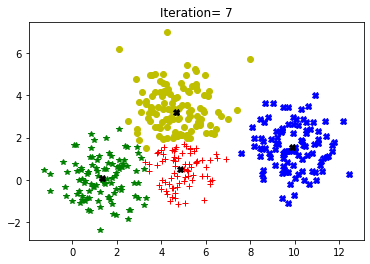

______________________________________________________________
8


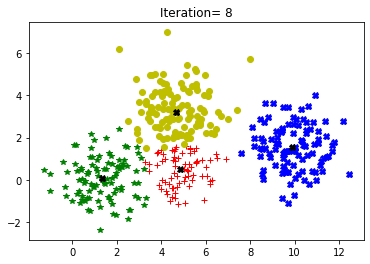

______________________________________________________________
9


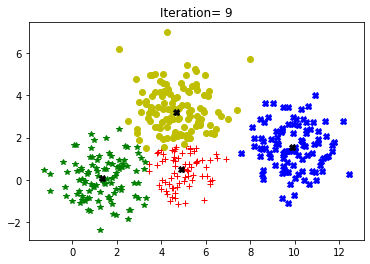

______________________________________________________________
10


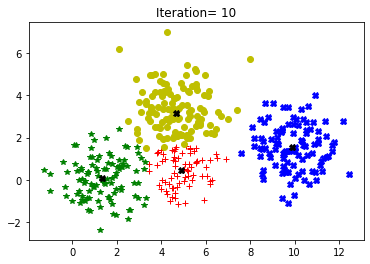

______________________________________________________________
11


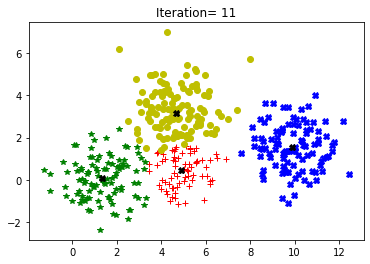

______________________________________________________________
12


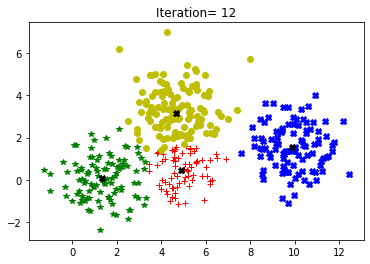

______________________________________________________________
13


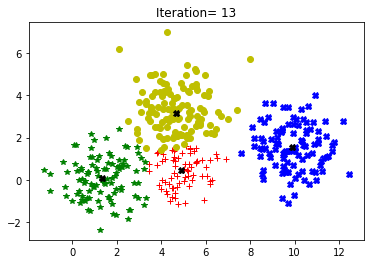

______________________________________________________________
14


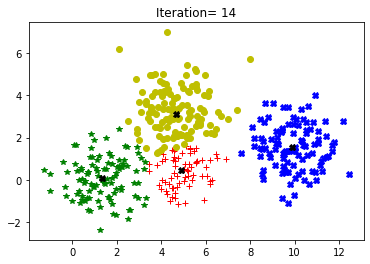

______________________________________________________________
15


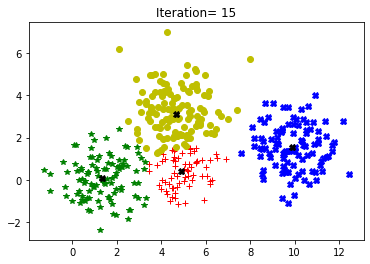

______________________________________________________________
16


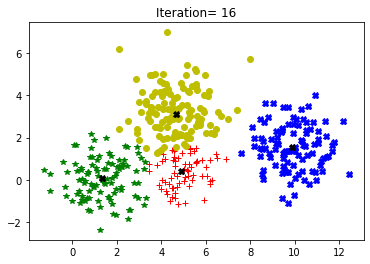

______________________________________________________________
17


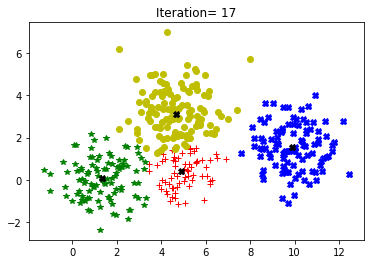

______________________________________________________________
18


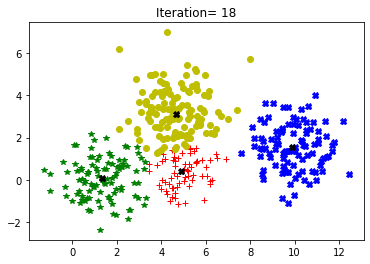

______________________________________________________________
19


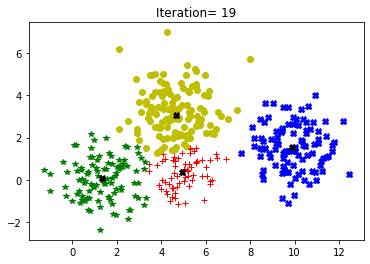

______________________________________________________________
20


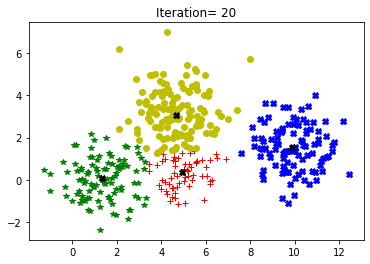

______________________________________________________________
21


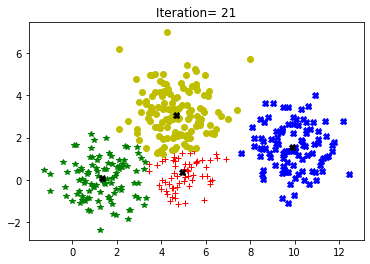

______________________________________________________________
22


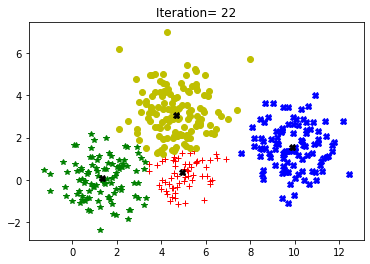

______________________________________________________________
23


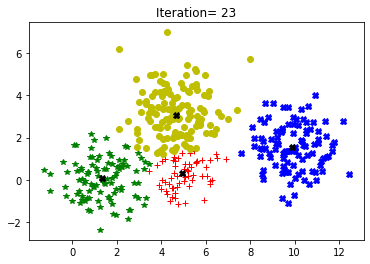

______________________________________________________________
24


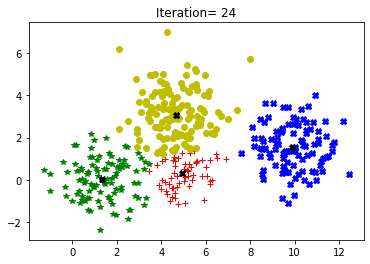

______________________________________________________________
25


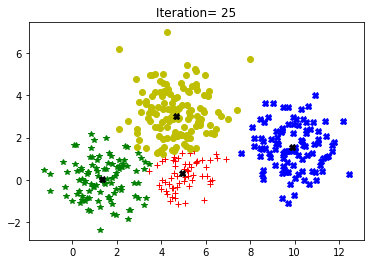

______________________________________________________________
26


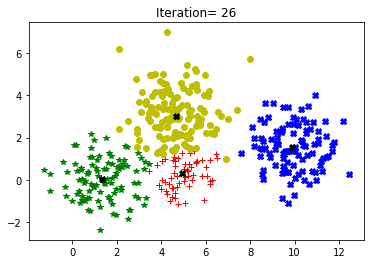

______________________________________________________________
27


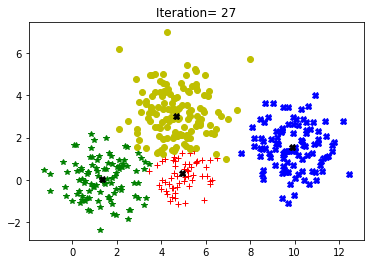

______________________________________________________________
28


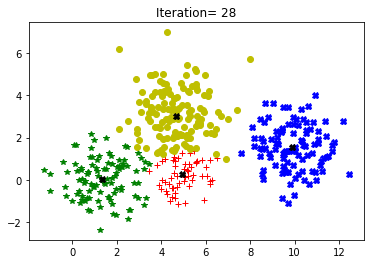

______________________________________________________________
29


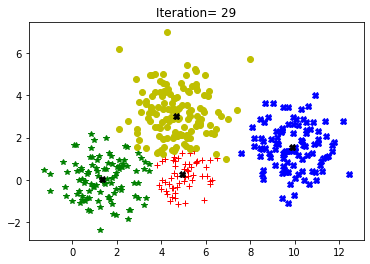

______________________________________________________________
30


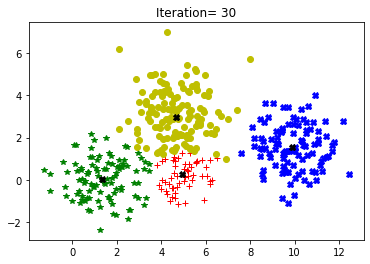

______________________________________________________________
31


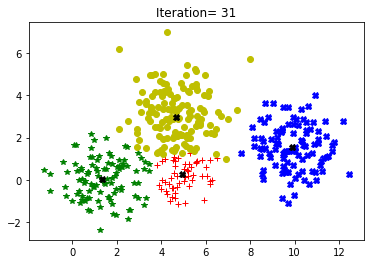

______________________________________________________________
32


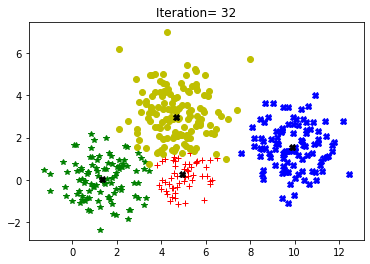

______________________________________________________________
33


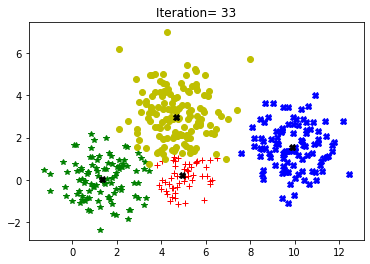

______________________________________________________________
34


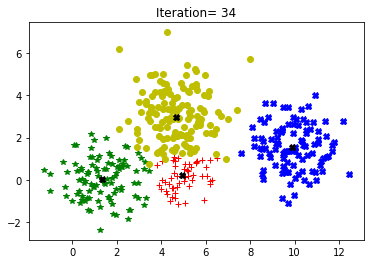

______________________________________________________________
35


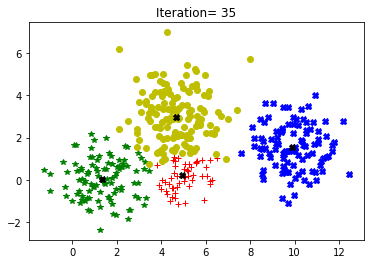

______________________________________________________________
36


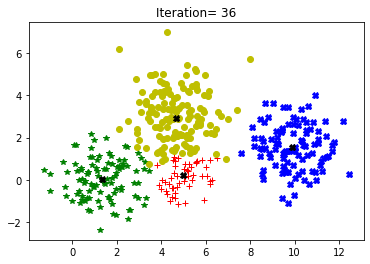

______________________________________________________________
37


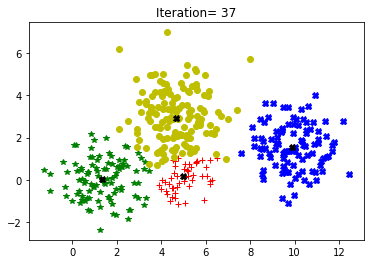

______________________________________________________________
38


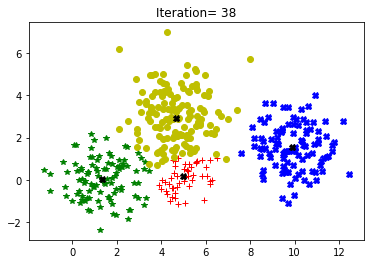

______________________________________________________________
39


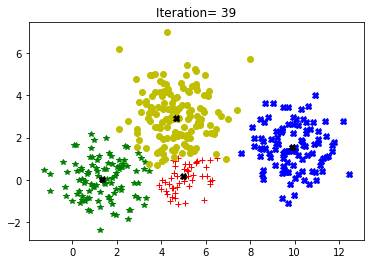

______________________________________________________________
40


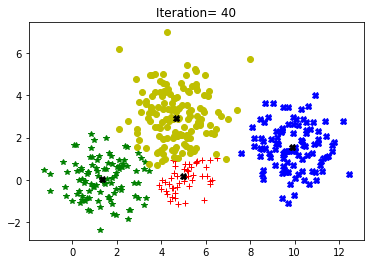

______________________________________________________________
41


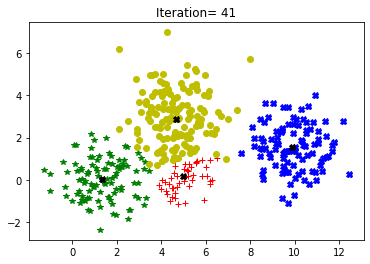

______________________________________________________________
42


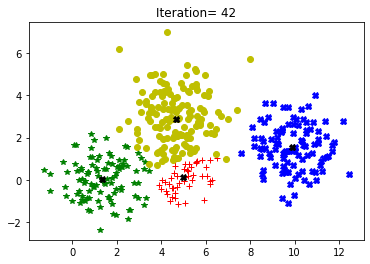

______________________________________________________________
43


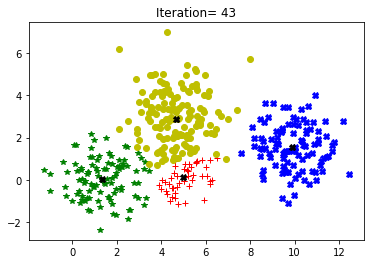

______________________________________________________________
44


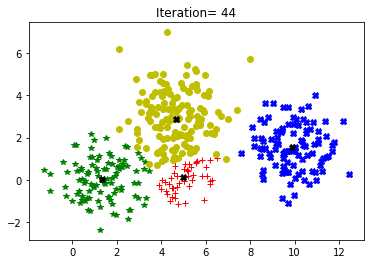

______________________________________________________________
45


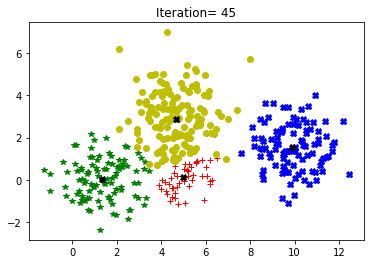

______________________________________________________________
46


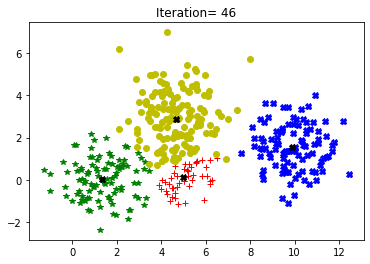

______________________________________________________________
47


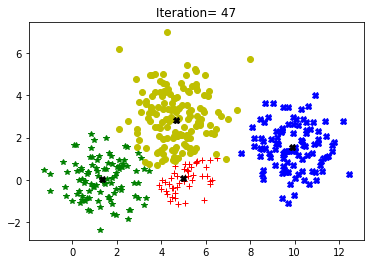

______________________________________________________________
48


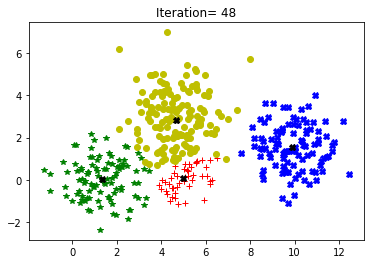

______________________________________________________________
49


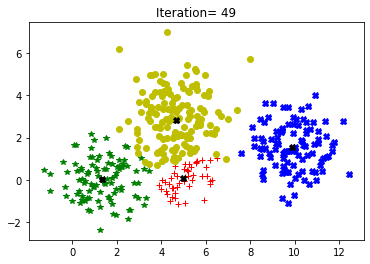

______________________________________________________________


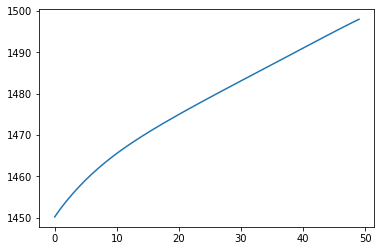

In [ ]:
log_l=[]
Itr=50
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']
#data_gmm = np.array([[1,2],[2,3],[3,4],[4,5]])

K=4   # no. of clusters

theta=initialization(data_gmm,K,100)

for n in range(Itr):
  print(n)
  responsibility=E_Step_GMM(data_gmm,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(data_gmm,responsibility)
  
  log_l.append(log_likhd)

  plt.figure()
  for l in range(K):
    id=np.where(cluster_label==l)
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
  for theta_cur in theta:
    phi_cur = theta_cur[0];
    Cents = phi_cur[0]
    plt.plot(Cents[0],Cents[1],'X',color='k')
  plt.title('Iteration= %d' % (n))
  plt.show()

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break
  print("______________________________________________________________")

plt.figure()  
plt.plot(log_l)

0


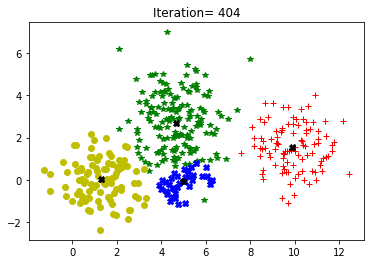

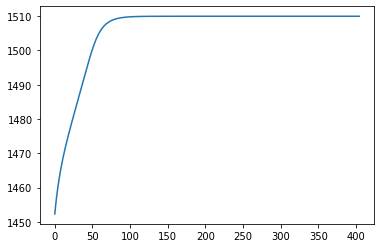

In [ ]:
log_l=[]
Itr=50
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']
#data_gmm = np.array([[1,2],[2,3],[3,4],[4,5]])

K=4   # no. of clusters

theta=initialization(data_gmm,K,100)
n = 0;
while (1):
#for n in range(Itr):
  if (n%1000==0):
    print(n)
  responsibility=E_Step_GMM(data_gmm,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(data_gmm,responsibility)
  
  log_l.append(log_likhd)

  

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      plt.figure()
      for l in range(K):
        id=np.where(cluster_label==l)
        plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
      for theta_cur in theta:
        phi_cur = theta_cur[0];
        Cents = phi_cur[0]
        plt.plot(Cents[0],Cents[1],'X',color='k')
      plt.title('Iteration= %d' % (n))
      plt.show()
      break
  n+=1;

plt.figure()  
plt.plot(log_l)

# 3. Write a code and report similar demonstration for Fuzzy c-means



(Note : Generate the data such that you can demonstare the drawback of K-means, and able to solve through GMM and fuzzy C-means, have to demonstrate clearly during viva)



iteration no : 0


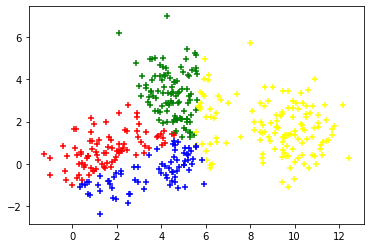

iteration no : 1


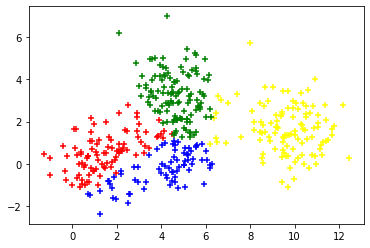

iteration no : 2


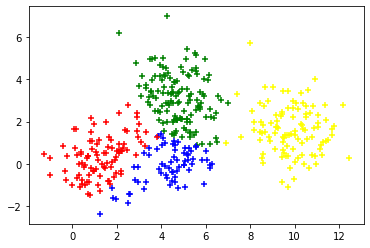

iteration no : 3


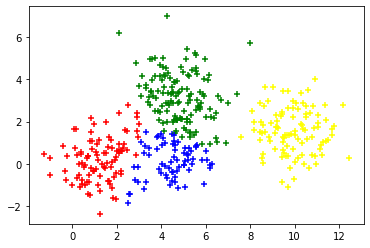

iteration no : 4


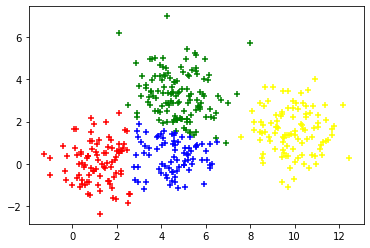

iteration no : 5


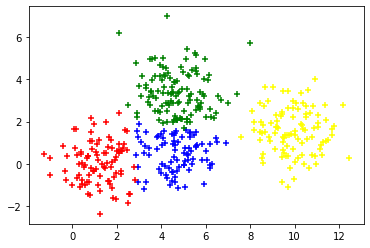

iteration no : 6


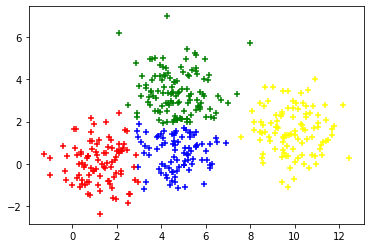

iteration no : 7


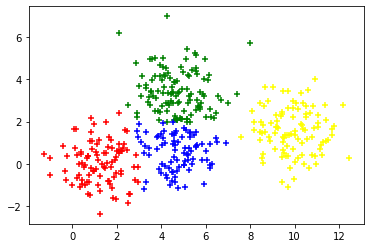

iteration no : 8


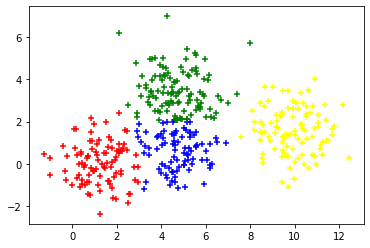

iteration no : 9


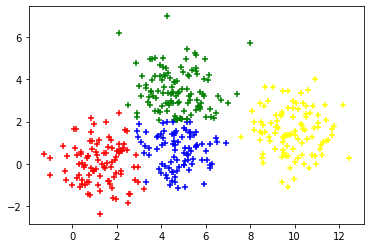

iteration no : 10


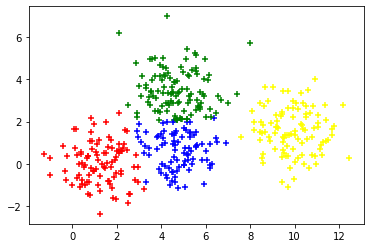

iteration no : 11


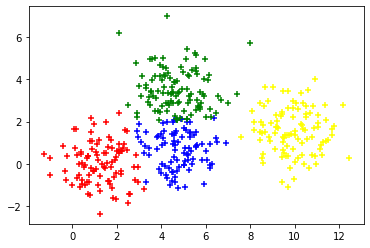

iteration no : 12


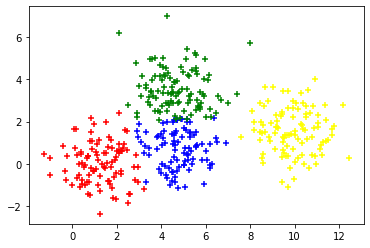

iteration no : 13


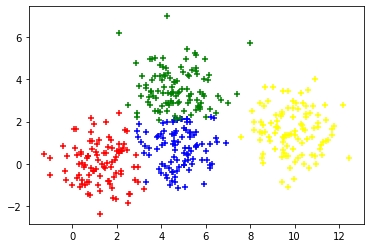

iteration no : 14


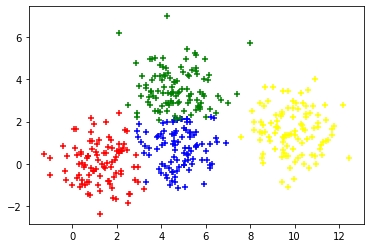

iteration no : 15


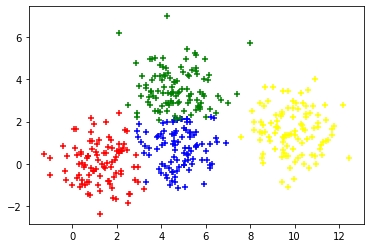

iteration no : 16


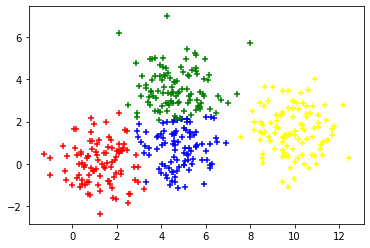

iteration no : 17


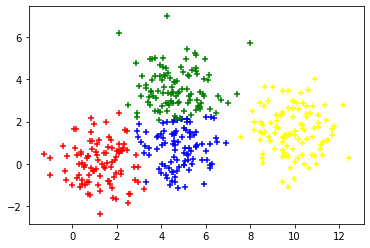

iteration no : 18


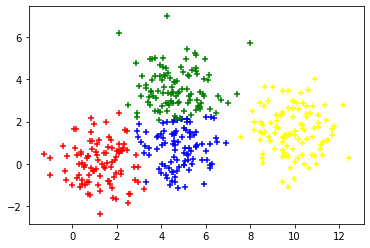

iteration no : 19


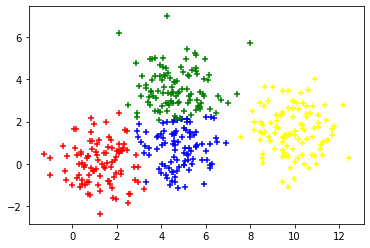

iteration no : 20


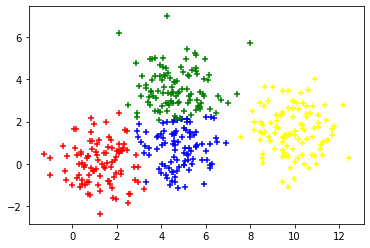

iteration no : 21


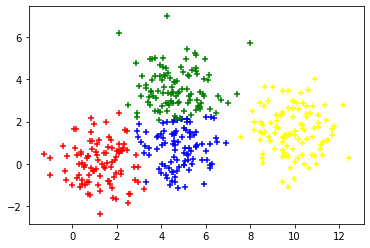

iteration no : 22


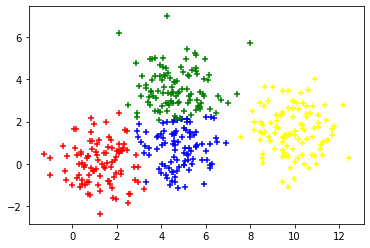

iteration no : 23


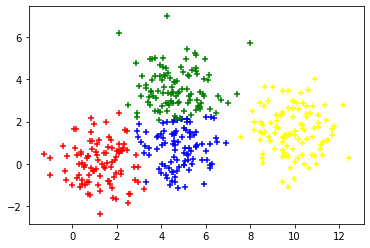

iteration no : 24


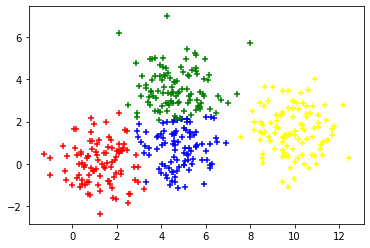

iteration no : 25


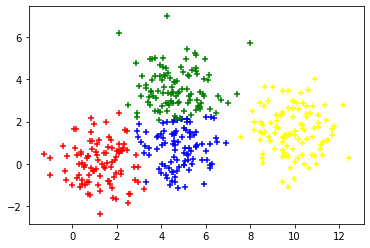

final classification


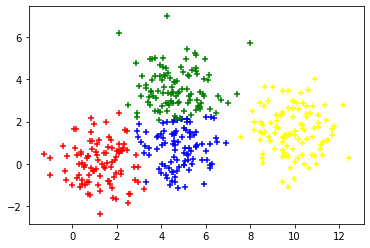

In [ ]:
class FuzzyC:
    # works for only 2D
    """ TODO :
        1 ) first find c centers randomly and calc dist matr and membership matr
        2 ) find new centers
        3 ) find dist matrix
        4 ) find new membership matrix
        5) Do it till convergence
    """
    def __init__(self, C, data):
        self.C = C
        self.N = data.shape[0]
        self.data = data
        self.distMatrix = np.array([])
        self.centers = np.array([])
        self.MM = np.array([])
        self.colors = ['red', 'yellow', 'blue', 'green', 'black']
    def ED(self, x1, y1, x2, y2):
        x1 = x1-x2
        y1 = y1-y2
        return x1*x1 + y1*y1
    def meu(self, p, c):
        x = 0
        for i in range(self.C):
            x += self.distMatrix[c][p] / self.distMatrix[i][p]
        return 1 / x
    def cost(self):
        res = 0
        for p in range(self.N):
            res += np.sum(np.square(self.MM[:, p]) * self.distMatrix[:, p])
        return res
    def updateCenters(self):
        self.centers = np.array([
            np.array([np.sum(np.square(self.MM[c, :]) * self.data[:, 0]) / np.sum(np.square(self.MM[c, :])), np.sum(np.square(self.MM[c, :]) * self.data[:, 1]) / np.sum(np.square(self.MM[c, :]))]) for c in range(self.C)
            ])
    def updateMM(self):
        self.MM = np.array(
            [[ self.meu(p, c) for p in range(self.N)] for c in range(self.C)]
        )
    def updateDistM(self):
        self.distMatrix = np.array(
            [[ self.ED(p[0], p[1], c[0], c[1]) for p in self.data] for c in self.centers]
        )
    def doFCM(self):
        self.centers = np.array([np.array([np.random.randn(), np.random.randn()]) for i in range(self.C)])
        self.updateDistM()
        self.updateMM()

        curCost = self.cost()
        preCost = curCost + int(1e2)
        eps = 1e-6

        cnt=0
        #iterate till convergance
        while preCost-curCost >= eps:
            print("iteration no :", cnt)
            preCost = curCost
            self.updateCenters()
            self.updateDistM()
            self.updateMM()
            curCost = self.cost()
            self.showGraph()
            cnt+=1
    def showGraph(self):
        for p in range(self.N):
            cl = np.argmax(self.MM[:, p])
            plt.scatter(self.data[p][0], self.data[p][1], marker='+', color=self.colors[cl])
        plt.show()

fcm = FuzzyC(4, data)
fcm.doFCM()
print("final classification")
fcm.showGraph()

# 4. Practical Example



## Using K-means

a) Data preparation




1. Load Mnist data
2. Take only two class '1' and '5'




In [ ]:
#K-means function
def myK_means(data,K):
  all_clusters_info = []
  for i in range(1):
    Initial_centers = data[np.random.choice(data.shape[0], K, replace=False),:]
    eps = 0.000001

    clusters,centers = cluster_assignment(data,Initial_centers)
    err = [error(clusters,centers)]
    centers = get_centers(clusters)
    i =1;

    while(1):
      clusters,centers = cluster_assignment(data,centers)
      err.append(error(clusters,centers))
      if((err[i-1]-err[i])<eps):
        break;
      centers = get_centers(clusters)
      i+=1
    all_clusters_info.append([clusters,centers])
  
  all_error = []
  
  for x in all_clusters_info:
    all_error.append(error(x[0],x[1]))

  best_cluster_info = all_clusters_info[np.argmin(all_error)]
  return best_cluster_info


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_test -> (28,28)
#X_test.flatten()

train_data = []
test_data = []

for i in range(len(X_train)):
    if y_train[i] == 1 or y_train[i] == 5:
        train_data.append(X_train[i].flatten()/255)

train_data = np.array(train_data)
print("Train data shape",train_data.shape)

for i in range(len(X_test)):
    if y_test[i] == 1 or y_test[i] == 5:
        test_data.append(X_test[i].flatten()/255)

test_data = np.array(test_data)
print("Train data shape",test_data.shape)

Train data shape (12163, 784)
Train data shape (2027, 784)


Performing K means

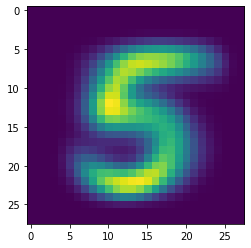

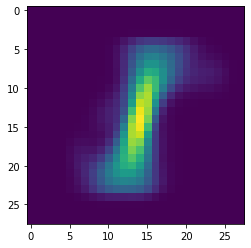

In [ ]:
info = myK_means(train_data,2)

for center in info[1]:
    # each cluster center is mean vector  which we will reshape to 28x28 and print this  image
    plt.imshow(center.reshape(28, 28))
    plt.show()

# 5. Perform the same task for GMM and fuzzy c-means

Performing GMM

Fuzz C means

(784,)


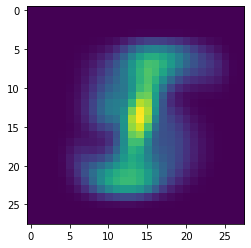

(784,)


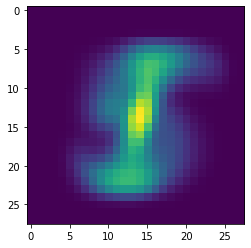

In [ ]:
class FuzzyC:
    """ TODO :
        1 ) first find c centers randomly and calc dist matr and membership matr
        2 ) find new centers
        3 ) find dist matrix
        4 ) find new membership matrix
        5 ) do it till convergence and f*k this algo
    """
    def __init__(self, C, data):
        self.C = C
        self.Dim = data.shape[1]
        self.N = data.shape[0]
        self.data = data
        self.distMatrix = np.array([])
        self.centers = np.array([])
        self.MM = np.array([])
        self.colors = ['red', 'yellow', 'blue', 'green', 'black']
    def ED(self, v1, v2):
        return np.sum(np.square(v1-v2))
    def meu(self, p, c):
        x = 0
        for i in range(self.C):
            x += self.distMatrix[c][p] / self.distMatrix[i][p]
        return 1 / x
    def cost(self):
        res = 0
        for p in range(self.N):
            res += np.sum(np.square(self.MM[:, p]) * self.distMatrix[:, p])
        return res
    def updateCenters(self):
        self.centers = np.array([
            np.array([np.sum(np.square(self.MM[c, :]) * self.data[:, dim]) / np.sum(np.square(self.MM[c, :])) for dim in range(self.Dim)]) for c in range(self.C)
            ])
    def updateMM(self):
        self.MM = np.array(
            [[ self.meu(p, c) for p in range(self.N)] for c in range(self.C)]
        )
    def updateDistM(self):
        self.distMatrix = np.array(
            [[ self.ED(p, c) for p in self.data] for c in self.centers]
        )
    def doFCM(self):
        # self.centers = data[np.random.choice(data.shape[0], 4, replace=False),:]
        self.centers = np.array([np.array([np.random.randn() for dim in range(self.Dim)]) for i in range(self.C)])
        self.updateDistM()
        self.updateMM()

        curCost = self.cost()
        preCost = curCost + int(1e2)
        eps = 1e-6

        #iterate till convergance
        while preCost-curCost >= eps:
            preCost = curCost
            self.updateCenters()
            self.updateDistM()
            self.updateMM()
            curCost = self.cost()
        return self.centers
    def showGraph(self):
        for p in range(self.N):
            cl = np.argmax(self.MM[:, p])
            plt.scatter(self.data[p][0], self.data[p][1], marker='+', color=self.colors[cl])
        plt.show()

fcm = FuzzyC(2, train_data)
info_fuzzy = fcm.doFCM()



for i in range(len(info_fuzzy)):
    # each cluster center is mean vector  which we will reshape to 28x28 and print this  image
    center = info_fuzzy[i,:]
    print(center.shape)
    plt.imshow(center.reshape(28, 28))
    plt.show()

GMM

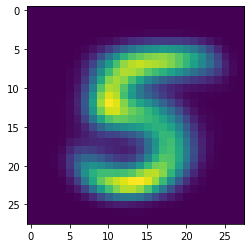

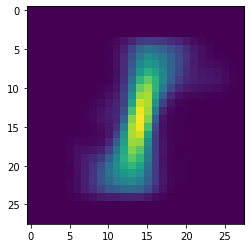

In [ ]:
from sklearn import mixture
g = mixture.GaussianMixture(n_components=2)
g.fit(test_data)
for cluster_center in g.means_:
    # each cluster center is mean vector  which we will reshape to 28x28 and print this  image
    plt.imshow(cluster_center.reshape(28, 28))
    plt.show()

# 6. Repeat the same for 3 class and perform the K-means, GMM and Fuzzy c-means clustering

In [ ]:
train_data_3 = []
test_data_3 = []

for i in range(len(X_train)):
    if y_train[i] == 1 or y_train[i] == 5 or y_train[i] == 9:
        train_data_3.append(X_train[i].flatten()/255)

train_data_3 = np.array(train_data_3)
print("Train data shape",train_data_3.shape)

for i in range(len(X_test)):
    if y_test[i] == 1 or y_test[i] == 5 or y_train[i] == 9:
        test_data_3.append(X_test[i].flatten()/255)

test_data_3 = np.array(test_data_3)
print("Test data shape",test_data_3.shape)

Train data shape (18112, 784)
Train data shape (2799, 784)


K- Means

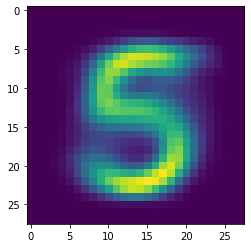

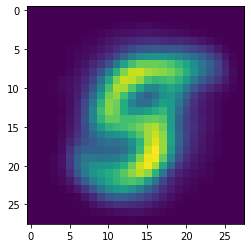

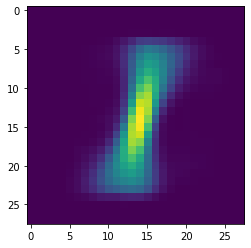

In [ ]:
info = myK_means(test_data_3,3)

for center in info[1]:
    # each cluster center is mean vector  which we will reshape to 28x28 and print this  image
    plt.imshow(center.reshape(28, 28))
    plt.show()

Fuzzy C

(784,)


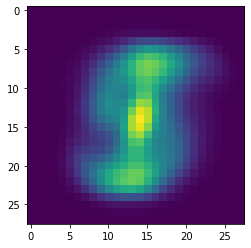

(784,)


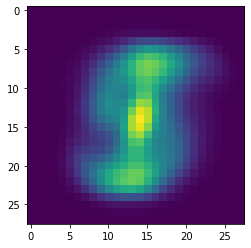

(784,)


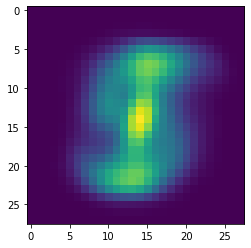

In [ ]:
fcm = FuzzyC(3, test_data_3)
info_fuzzy = fcm.doFCM()

for i in range(len(info_fuzzy)):
    # each cluster center is mean vector  which we will reshape to 28x28 and print this  image
    center = info_fuzzy[i,:]
    print(center.shape)
    plt.imshow(center.reshape(28, 28))
    plt.show()

GMM

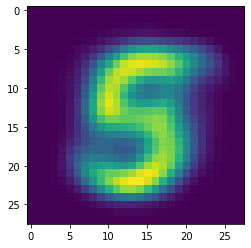

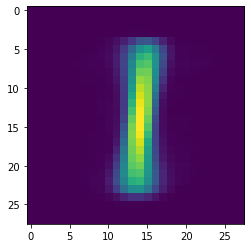

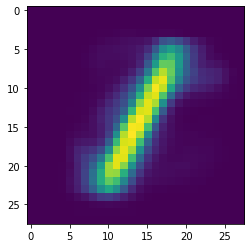

In [ ]:
g2 = mixture.GaussianMixture(n_components=3)
g2.fit(test_data_3)
for cluster_center in g2.means_:
    # each cluster center is mean vector  which we will reshape to 28x28 and print this  image
    plt.imshow(cluster_center.reshape(28, 28))
    plt.show()

# 7. Perform DBSCAN and show the advantages of DBSCAN over model and distance based clustering. 

expected: (should visualize the cluster pattern that Model and distance based clustering can not able to capture but can be captured through DBSCAN)

In [ ]:
# DBSCAN Algo

import numpy as np

def isneighbour(p1,p2,r):
  return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 <= r)

def getneighbours(point,points,r):
  num = 0
  indecies = []
  for i in range(len(points)):
    if(isneighbour(points[point],points[i],r)):
      indecies.append(i)
      num = num + 1
  return num-1,indecies

def myDBSCAN(points,r,k):
  m,n = np.shape(points)
  listpoints = np.zeros((m,n+1))
  listpoints[:,:-1] = points
  points = listpoints.tolist()
  rtn = []
  n = 0
  neighbours = []
  core = []
  clusters = []
  for i in range(len(points)):
    n = 0
    neighbours = []
    cluster = []
    core = [] 
    if(points[i][2]==0):
      n,neighbours = getneighbours(i,points,r)
      if(n >= k):
        points[i][2]=1
        core.append(neighbours)
        core = core[0]
        while(core):
          j = core.pop()
          if(points[j][2]==0):
            cluster.append(j)
            points[j][2] = 1
            nj,neighbours = getneighbours(j,points,r)
            if(nj > k):
              core.extend(neighbours)
        if(cluster != []):
          clusters.append(cluster)
  outliers = []
  for i in range(len(points)):
    if(points[i][2]==0):
      outliers.append(j)
  return clusters,outliers


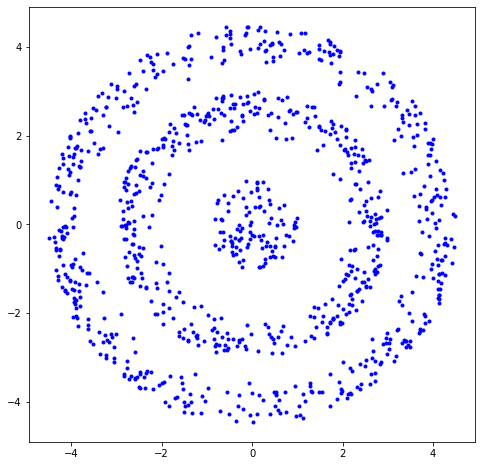

In [ ]:
import matplotlib.pyplot as plt
import random
import math

# generating data
alpha = 2*math.pi*np.random.rand(400,1)
r = 2 + np.sqrt(np.random.rand(400,1))
x = r*np.cos(alpha)
y = r*np.sin(alpha)

alpha = 2*math.pi*np.random.rand(100,1)
r = np.sqrt(np.random.rand(100,1))
x = np.concatenate((x,r*np.cos(alpha)))
y = np.concatenate((y,r*np.sin(alpha)))

alpha = 2*math.pi*np.random.rand(500,1)
r = 3.5 + np.sqrt(np.random.rand(500,1))
x = np.concatenate((x,r*np.cos(alpha)))
y = np.concatenate((y,r*np.sin(alpha)))

data = np.concatenate((x,y),axis=1)

plt.subplots(figsize=(8,8))
plt.plot(data[:,0],data[:,1],'b.')

(3,)


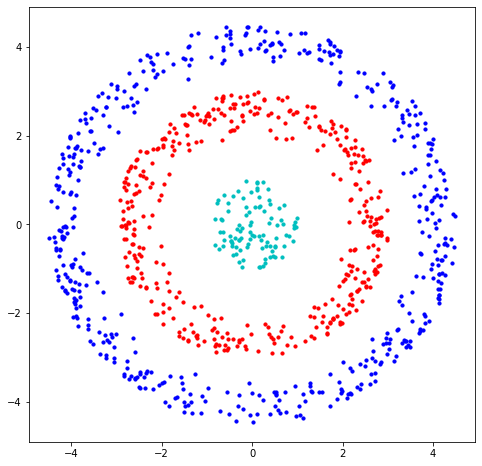

In [ ]:
clusters,outliers = myDBSCAN(data,0.2,3)
print(np.shape(clusters))

plt.subplots(figsize=(8,8))
label_color =  ['r','c','b','m','y']
for m,color in zip(clusters,label_color):
  for i in m:
    plt.scatter(data[i][0],data[i][1],c=color,s=10)
for i in outliers:
  plt.scatter(data[i][0],data[i][1],c='k',s=10)
plt.show()  

# 8. Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.


**Divisive Clustering:**

It is an opposite of Agglomerative clustering. In this we start from one cluster which contains all data points in one.  Iteratively we separate all the cluster of points which aren't similar in characteristics. It is also called top-bottom approach.



## Agglomerative Clustering:

Lets start with some domy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





--------------------
iteration no :  0
inf 1.0 25.0 41.0 55.25 
1.0 inf 18.0 32.0 45.25 
25.0 18.0 inf 2.0 6.25 
41.0 32.0 2.0 inf 1.25 
55.25 45.25 6.25 1.25 inf 
--------------------
merged clusters : 0 1
--------------------
iteration no :  1
inf 1.0 25.0 41.0 55.25 
1.0 inf 18.0 32.0 45.25 
25.0 18.0 inf 2.0 6.25 
41.0 32.0 2.0 inf 1.25 
55.25 45.25 6.25 1.25 inf 
--------------------
merged clusters : 3 4
--------------------
iteration no :  2
inf 1.0 25.0 41.0 55.25 
1.0 inf 18.0 32.0 45.25 
25.0 18.0 inf 2.0 6.25 
41.0 32.0 2.0 inf 1.25 
55.25 45.25 6.25 1.25 inf 
--------------------
merged clusters : 2 3
--------------------
iteration no :  3
inf 1.0 25.0 41.0 55.25 
1.0 inf 18.0 32.0 45.25 
25.0 18.0 inf 2.0 6.25 
41.0 32.0 2.0 inf 1.25 
55.25 45.25 6.25 1.25 inf 
--------------------
merged clusters : 0 2


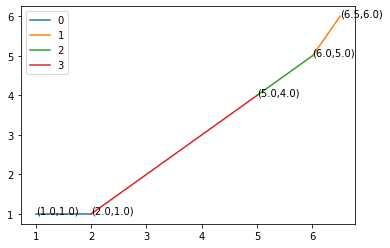

In [ ]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
N = X.shape[0]

par= [i for i in range(N)]

def fp(u):
    if par[u] == u :
        return u
    par[u] = fp(par[u])
    return par[u]
def merge(u, v):
    u, v = fp(u), fp(v)
    par[v] = u
    return
def ED(a, b):
    x, y = (a[0] - b[0]), (a[1] - b[1])
    return x*x + y*y
for itr in range(N-1):
    u, v, cur_dist = -1, -1, int(1e9)
    print('--------------------')
    print('iteration no : ', itr)
    for a in range(N):
        for b in range(N):
            if a == b :
                print("inf", end=" ")
            else:
                print(ED(X[a], X[b]), end=" ")
            if fp(a) != fp(b) and cur_dist > ED(X[a], X[b]) :
                u, v, cur_dist = a, b, ED(X[a], X[b])
        print("")
    print('--------------------')
    if u == -1 or v == -1 :
        exit("abort unexpected thing happened")
    print("merged clusters :", fp(u), fp(v))
    merge(u, v)
    plt.plot([X[u][0], X[v][0]], [X[u][1], X[v][1]], label=str(itr))

for i in range(N):
    plt.annotate("(" + str(X[i][0]) + "," + str(X[i][1]) + ")", (X[i][0], X[i][1]))
plt.legend()
plt.show()

import plotly.figure_factory as ff
X = X.T

lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()

## Divisive clustering:

It is a top down approach of hierarchial clustering

Lets start with some domy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$



1.   Find the biggest cluster (having highest diameter), initially the single cluster is the biggest cluster.

$$Diameter_{cluster}=\max_{i,j}||x_{i}-x_{j}||_{2}$$

$i,j$ will move over all the elements in the cluster.

2.  find the splinter element of the cluster by using the maximum average distance between the other elements. 
$$d_{k}=\frac{1}{N-1}\sum_{i=1}^{N}||x_{k}-x_{i}||_{2}$$
$splinter-group-element=arg \max_{1 \leq k \leq N} (d_{k})$

repeat the same and assign element to the splinter group untill the differance between average incluster distance and average splinter group distance of each element turns negative.

$$d_{avgsplint_{k}}=\frac{1}{M-1}\sum_{i=1}^{M}||x_{k}-x_{i}||_{2}$$

Stop: $$d_{k}-d_{avgsplint_{k}}<0$$
 and assign the splinter group as a new cluster.

 3. Repeat the step 1 and 2 untill each cluster have only one element.

 4.**Plot the cluster split with respect to their diameter** 












In [ ]:
import numpy as np

def Euclidian_Dist(p1,p2):
    p1,p2 = np.array(p1),np.array(p2)
    return np.sum(np.square(p1-p2))

def get_diameter(clusters, i):
    """Returns the diameter of the ith cluster in X"""
    cluster = clusters[i]
    num = len(cluster)
    diameter = 0
    pt1 = -1
    pt2 = -1
    for i in range(num):
        for j in range(i+1,num,1):
            dist = Euclidian_Dist(cluster[i],cluster[j])
            if (diameter < dist):
                diameter = dist
                pt1 = i
                pt2 = j
    return diameter, pt1, pt2

def get_biggest_cluster(clusters):
    """ Returns the cluster index having largest diameter"""
    largest_dia = 0
    max_cluster_ind = 0
    pt1 = -1
    pt2 = -1
    for i in range(len(clusters)):
        dia,temp1,temp2 = get_diameter(clusters,i)
        if(largest_dia < dia):
            largest_dia = dia
            max_cluster_ind = i
            pt1 = temp1
            pt2 = temp2
    return max_cluster_ind,pt1,pt2,largest_dia

In [ ]:
import numpy as np
X = [ [1,1], [2,1], [5,4], [6,5], [6.5,6]]
num_points = len(X)
print(f'X:\n {np.transpose(X)}')
clusters = [X]
print('Initial Number of clusters:',len(clusters))
cnt = 0
diameters = []
listsplinters = []
while(num_points!=len(clusters)):
    cnt += 1
    print('------------- Iteration -',cnt,'----------------')
    biggest_cluster_index,pt1,pt2,largest_dia = get_biggest_cluster(clusters)
    diameters.append(math.sqrt(largest_dia))
    biggest_cluster = clusters.pop(biggest_cluster_index)
    print(f'Split at diameter : {math.sqrt(largest_dia)}')
    print('Biggest cluster ind is:', biggest_cluster_index)
    print(f'Biggest Cluster is:\n {np.transpose(biggest_cluster)}')
    splinter1 = [biggest_cluster[pt1]]
    splinter2 = [biggest_cluster[pt2]]
    print('Splinter:\n',np.transpose(splinter1))
    print(splinter2)
    for i in range(len(biggest_cluster)):
        if i!=pt1 and i!=pt2:
            point = biggest_cluster[i]
            d1 = Euclidian_Dist(biggest_cluster[pt1],point)
            d2 = Euclidian_Dist(biggest_cluster[pt2],point)
            if (d1<d2):
                print('New member added to splinter:\n',np.transpose(splinter1))
                splinter1.append(point)
            else:
                splinter2.append(point)
    newsplinter = np.transpose(splinter1)
    newcluster = np.transpose(splinter2)
    listsplinters.append(newsplinter)
    print(f'Final shape of new splinter is {np.shape(newsplinter)}\n{newsplinter}')
    print(f'Final shape of new cluster is {np.shape(newcluster)}\n{newcluster}')
    clusters.append(splinter1)
    clusters.append(splinter2)
    print(f'New num of clusters after spliting is: {len(clusters)}\n{clusters}')

print('\n\n here are the details : ')
print('\ndiameters where split happended : ')
for diameter in diameters:
    print(f'{diameter}')
import plotly.figure_factory as ff
X = np.array(X)
lab = []
for x in X:
    temp = '(' + str(x[0]) + ',' + str(x[1]) + ')'
    lab.append(temp)
print(lab)
fig = ff.create_dendrogram(X,labels=lab)
fig.update_layout(width=900, height=400)
fig.show()

X:
 [[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
Initial Number of clusters: 1
------------- Iteration - 1 ----------------
Split at diameter : 7.433034373659253
Biggest cluster ind is: 0
Biggest Cluster is:
 [[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
Splinter:
 [[1]
 [1]]
[[6.5, 6]]
New member added to splinter:
 [[1]
 [1]]
Final shape of new splinter is (2, 2)
[[1 2]
 [1 1]]
Final shape of new cluster is (2, 3)
[[6.5 5.  6. ]
 [6.  4.  5. ]]
New num of clusters after spliting is: 2
[[[1, 1], [2, 1]], [[6.5, 6], [5, 4], [6, 5]]]
------------- Iteration - 2 ----------------
Split at diameter : 2.5
Biggest cluster ind is: 1
Biggest Cluster is:
 [[6.5 5.  6. ]
 [6.  4.  5. ]]
Splinter:
 [[6.5]
 [6. ]]
[[5, 4]]
New member added to splinter:
 [[6.5]
 [6. ]]
Final shape of new splinter is (2, 2)
[[6.5 6. ]
 [6.  5. ]]
Final shape of new cluster is (2, 1)
[[5]
 [4]]
New num of clusters after spliting is: 3
[[[1, 1], [2, 1]], [[6.5, 6], [6, 5]], [[5, 4]]]
------------- Iteration - 3 ---

# 9.Take a real data example and demonstrate both Agglomerative and Divisive clustering.

X:
 [[-2.65151967 -1.92403786 -1.95942476 -1.73448148  0.26239472  0.05348873
   2.41142086 -2.7456806  -1.84865623 -0.19068785  0.29295494  1.02370963
   2.4538708  -0.69389766  2.80370698  0.87234273  2.8018425   1.22231047
  -2.15243857 -2.02124075  2.33991726  2.30520355  0.06528135 -2.76922832
   1.68008871 -0.57082773  0.15316098  0.54294102  0.55313852  0.05974471
   0.62604928 -0.20529163 -0.03956471 -0.22539363  0.1241234  -0.07233011
   0.48994192 -0.19311497  0.79654914 -0.13058324  0.32842756  0.05354031
  -0.84661434  0.47003543  0.54521891  0.45246846 -0.52226523  0.55058251
  -0.27123057 -0.29505436  0.95402633 -3.84078215 -1.99184396 -4.00800939
   0.84026557 -0.31855702 -3.5837247   3.71405753  1.9913715  -3.43559845
  -3.12873605  4.23499844 -4.05270756  4.01569709  0.98257285  3.22816431
   2.65554097 -4.17532662 -4.01076281 -0.47512647 -3.90046092 -3.99607474
   0.43594614  2.70186146 -3.75292915]
 [ 0.93147609 -1.49268994 -2.08743919  1.93165345 -2.79085332  2.4189

--------------------
iteration no :  0
merged clusters : 27 36
--------------------
iteration no :  1
merged clusters : 5 22
--------------------
iteration no :  2
merged clusters : 30 44
--------------------
iteration no :  3
merged clusters : 26 34
--------------------
iteration no :  4
merged clusters : 27 45
--------------------
iteration no :  5
merged clusters : 51 70
--------------------
iteration no :  6
merged clusters : 28 47
--------------------
iteration no :  7
merged clusters : 31 49
--------------------
iteration no :  8
merged clusters : 62 68
--------------------
iteration no :  9
merged clusters : 66 73
--------------------
iteration no :  10
merged clusters : 28 30
--------------------
iteration no :  11
merged clusters : 32 35
--------------------
iteration no :  12
merged clusters : 32 26
--------------------
iteration no :  13
merged clusters : 4 10
--------------------
iteration no :  14
merged clusters : 11 17
--------------------
iteration no :  15
merged clust

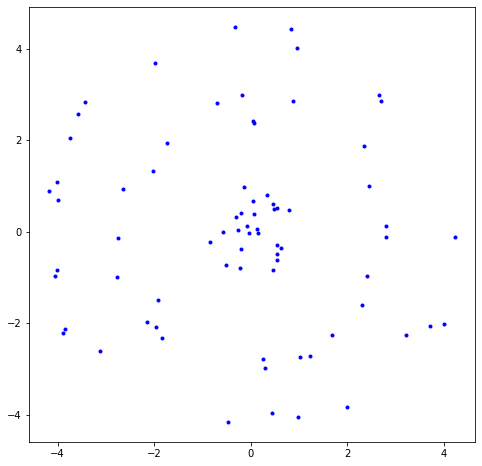

In [ ]:
# data 
import random
import math
import numpy as np
import matplotlib.pyplot as plt


alpha = 2*math.pi*np.random.rand(25,1)
r = 2 + np.sqrt(np.random.rand(25,1))
x = r*np.cos(alpha)
y = r*np.sin(alpha)

alpha = 2*math.pi*np.random.rand(25,1)
r = np.sqrt(np.random.rand(25,1))
x = np.concatenate((x,r*np.cos(alpha)))
y = np.concatenate((y,r*np.sin(alpha)))

alpha = 2*math.pi*np.random.rand(25,1)
r = 3.5 + np.sqrt(np.random.rand(25,1))
x = np.concatenate((x,r*np.cos(alpha)))
y = np.concatenate((y,r*np.sin(alpha)))

data = np.concatenate((x,y),axis=1)

plt.subplots(figsize=(8,8))
plt.plot(data[:,0],data[:,1],'b.')




######
X = data
num_points = len(X)
print(f'X:\n {np.transpose(X)}')
clusters = [X]
# print('Initial Number of clusters:',len(clusters))
cnt = 0
diameters = []
listsplinters = []
while(num_points!=len(clusters)):
    cnt += 1
    print('------------- Iteration -',cnt,'----------------')
    biggest_cluster_index,pt1,pt2,largest_dia = get_biggest_cluster(clusters)
    diameters.append(math.sqrt(largest_dia))
    biggest_cluster = clusters.pop(biggest_cluster_index)
    # print(f'Split at diameter : {math.sqrt(largest_dia)}')
    # print('Biggest cluster ind is:', biggest_cluster_index)
    # print(f'Biggest Cluster is:\n {np.transpose(biggest_cluster)}')
    splinter1 = [biggest_cluster[pt1]]
    splinter2 = [biggest_cluster[pt2]]
    # print('Splinter:\n',np.transpose(splinter1))
    # print(splinter2)
    for i in range(len(biggest_cluster)):
        if i!=pt1 and i!=pt2:
            point = biggest_cluster[i]
            d1 = Euclidian_Dist(biggest_cluster[pt1],point)
            d2 = Euclidian_Dist(biggest_cluster[pt2],point)
            if (d1<d2):
                # print('New member added to splinter:\n',np.transpose(splinter1))
                splinter1.append(point)
            else:
                splinter2.append(point)
    newsplinter = np.transpose(splinter1)
    newcluster = np.transpose(splinter2)
    listsplinters.append(newsplinter)
    # print(f'Final shape of new splinter is {np.shape(newsplinter)}\n{newsplinter}')
    # print(f'Final shape of new cluster is {np.shape(newcluster)}\n{newcluster}')
    clusters.append(splinter1)
    clusters.append(splinter2)
    # print(f'New num of clusters after spliting is: {len(clusters)}\n{clusters}')

# print('\n\n here are the details : ')
# print('\ndiameters where split happended : ')
# for diameter in diameters:
#     print(f'{diameter}')
import plotly.figure_factory as ff
X = np.array(X)
lab = []
for x in X:
    temp = '(' + str(x[0]) + ',' + str(x[1]) + ')'
    lab.append(temp)
# print(lab)
fig = ff.create_dendrogram(X,labels=lab)
fig.update_layout(width=900, height=400)
fig.show()


## algomerative

# set data here
X=data
N = X.shape[0]

par= [i for i in range(N)]
def fp(u):
    if par[u] == u :
        return u
    par[u] = fp(par[u])
    return par[u]
def merge(u, v):
    u, v = fp(u), fp(v)
    par[v] = u
    return
def ED(a, b):
    return np.sum(np.square(a - b))
def aglomerate(X):
    for itr in range(N-1):
        u, v, cur_dist = -1, -1, int(1e12)
        print('--------------------')
        print('iteration no : ', itr)
        for a in range(N):
            for b in range(N):
                if fp(a) != fp(b) and cur_dist > ED(X[a], X[b]) :
                    u, v, cur_dist = a, b, ED(X[a], X[b])
            # print("")
        # print('--------------------')
        if u == -1 or v == -1 :
            exit("abort unexpected thing happened")
        print("merged clusters :", fp(u), fp(v))
        merge(u, v)

aglomerate(X)


#10. Practical example 2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [ ]:
customer_data = pd.read_csv('/content/gdrive/My Drive/sem5/PRML/PRML_Data/shopping-data.csv')
customer_data.shape
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data = customer_data.iloc[:, 3:5].values

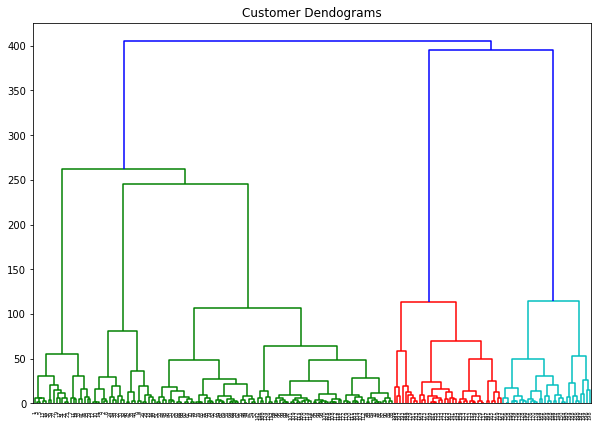

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

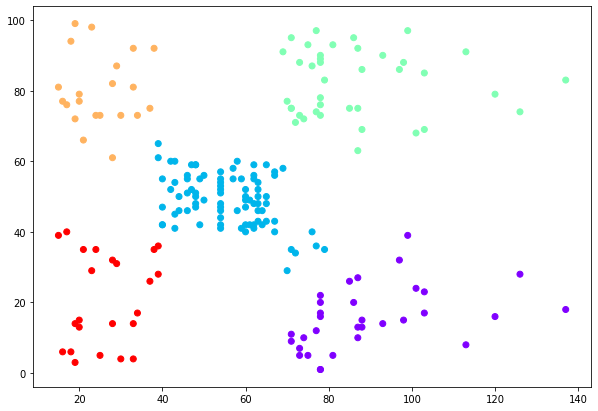

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

You can see the data points in the form of five clusters. The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. Similarly, the customers at top right (green data points), these are the customers with high salaries and high spending. These are the type of customers that companies target. The customers in the middle (blue data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.